# Research on apartment sales ads

You will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the city center, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('real_estate_data_us.csv', sep = '\t')

df.head(5)

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07T00:00:00,NaN,260000.0,3,25.0,51.0,108.0,NaN,2.70,16.0,...,NaN,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04T00:00:00,81.0,67000.0,1,11.0,18.6,40.4,2.0,NaN,11.0,...,NaN,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20T00:00:00,558.0,103920.0,2,8.3,34.3,56.0,0.0,NaN,5.0,...,NaN,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24T00:00:00,424.0,1298000.0,3,NaN,NaN,159.0,0.0,NaN,14.0,...,NaN,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19T00:00:00,121.0,200000.0,2,41.0,32.0,100.0,NaN,3.03,14.0,...,NaN,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0


In [2]:
#not all columns are showing on the screen
df.columns

Index(['date_posted', 'days_listed', 'last_price', 'bedrooms', 'kitchen_area',
       'living_area', 'total_area', 'balconies', 'ceiling_height',
       'floors_total', 'floor', 'total_images', 'bike_parking', 'is_studio',
       'is_open_plan', 'locality_name', 'airport_dist', 'city_center_dist',
       'park_dist', 'parks_within_3000', 'pond_dist', 'ponds_within_3000'],
      dtype='object')

In [3]:
#in order to view the data, will devide it, just for convinance.
df_part1 = df[['date_posted', 'days_listed', 'last_price', 'bedrooms', 'kitchen_area', 'living_area', 'total_area', 'balconies', 'ceiling_height']]
df_part1.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height
0,2019-03-07T00:00:00,NaN,260000.0,3,25.0,51.0,108.0,NaN,2.70
1,2018-12-04T00:00:00,81.0,67000.0,1,11.0,18.6,40.4,2.0,NaN
2,2015-08-20T00:00:00,558.0,103920.0,2,8.3,34.3,56.0,0.0,NaN
3,2015-07-24T00:00:00,424.0,1298000.0,3,NaN,NaN,159.0,0.0,NaN
4,2018-06-19T00:00:00,121.0,200000.0,2,41.0,32.0,100.0,NaN,3.03


In [4]:
df_part2 = df[['floors_total', 'floor', 'total_images', 'bike_parking', 'is_studio', 'is_open_plan', 'locality_name', 'airport_dist', 'city_center_dist']]
df_part2.head()

,floors_total,floor,total_images,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist
0,16.0,8,20,NaN,False,False,Saint Petersburg,18863.0,16028.0
1,11.0,1,7,NaN,False,False,Shushary village,12817.0,18603.0
2,5.0,4,10,NaN,False,False,Saint Petersburg,21741.0,13933.0
3,14.0,9,0,NaN,False,False,Saint Petersburg,28098.0,6800.0
4,14.0,13,2,NaN,False,False,Saint Petersburg,31856.0,8098.0


In [5]:
df_part3 = df[['park_dist', 'parks_within_3000', 'pond_dist', 'ponds_within_3000']]
df_part3.head()

,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,482.0,1.0,755.0,2.0
1,NaN,0.0,NaN,0.0
2,90.0,1.0,574.0,2.0
3,84.0,2.0,234.0,3.0
4,112.0,2.0,48.0,1.0


In [6]:
df.describe()

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
count,20518.000000,2.369900e+04,23699.000000,21421.000000,21796.000000,23699.000000,12180.000000,14504.000000,23613.000000,23699.000000,23699.000000,18157.000000,18180.000000,8079.000000,18181.000000,9110.000000,18181.000000
mean,180.888634,1.308310e+05,2.070636,10.569807,34.457852,60.348651,1.150082,2.771499,10.673824,5.892358,9.858475,28793.672193,14191.277833,490.804555,0.611408,517.980900,0.770255
std,219.727988,2.177403e+05,1.078405,5.905438,22.030445,35.654083,1.071300,1.261056,6.597173,4.885249,5.682529,12630.880622,8608.386210,342.317995,0.802074,277.720643,0.938346
min,1.000000,2.440000e+02,0.000000,1.300000,2.000000,12.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,181.000000,1.000000,0.000000,13.000000,0.000000
25%,45.000000,6.800000e+04,1.000000,7.000000,18.600000,40.000000,0.000000,2.520000,5.000000,2.000000,6.000000,18585.000000,9238.000000,288.000000,0.000000,294.000000,0.000000
50%,95.000000,9.300000e+04,2.000000,9.100000,30.000000,52.000000,1.000000,2.650000,9.000000,4.000000,9.000000,26726.000000,13098.500000,455.000000,0.000000,502.000000,1.000000
75%,232.000000,1.360000e+05,3.000000,12.000000,42.300000,69.900000,2.000000,2.800000,16.000000,8.000000,14.000000,37273.000000,16293.000000,612.000000,1.000000,729.000000,1.000000
max,1580.000000,1.526000e+07,19.000000,112.000000,409.700000,900.000000,5.000000,100.000000,60.000000,33.000000,50.000000,84869.000000,65968.000000,3190.000000,3.000000,1344.000000,3.000000


In [7]:
df.shape

(23699, 22)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_posted        23699 non-null  object 
 1   days_listed        20518 non-null  float64
 2   last_price         23699 non-null  float64
 3   bedrooms           23699 non-null  int64  
 4   kitchen_area       21421 non-null  float64
 5   living_area        21796 non-null  float64
 6   total_area         23699 non-null  float64
 7   balconies          12180 non-null  float64
 8   ceiling_height     14504 non-null  float64
 9   floors_total       23613 non-null  float64
 10  floor              23699 non-null  int64  
 11  total_images       23699 non-null  int64  
 12  bike_parking       2775 non-null   object 
 13  is_studio          23699 non-null  bool   
 14  is_open_plan       23699 non-null  bool   
 15  locality_name      23650 non-null  object 
 16  airport_dist       181

### Conclusion

There are 23699 rows in the dataset.
Some of the columns have missing data, the count value is lower the 23699.
Some values are presented as float, such as last_price.
In the price of real-estate fractions are meaningless.  Will change it to int. 
The date at first glans seems to all be at the same time, if so, can delete that part, and change the date field into to a date field.
Field such as Bike parking is a Boolean filed, have Nan values, will change them to 0, representing "no". 


### Step 2. Data preprocessing

In [9]:
#date_posted
df['date_posted'] = pd.to_datetime(df['date_posted'], format = '%Y-%m-%dT%H:%M:%S')  

there are only 338 rows with values below 5.
so the fractions are meaningless


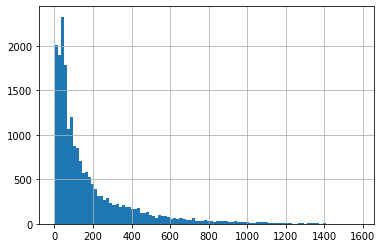

In [10]:
#days_listed

df['days_listed'].hist(bins=100)

under_5 = df['days_listed'][df['days_listed'] < 5].count()
print('there are only', under_5, 'rows with values below 5.')
print('so the fractions are meaningless')

In [11]:
#place 0 at missing values
df['days_listed'] = df['days_listed'].fillna(0)
#change type to int
df['days_listed'] = df['days_listed'].astype('int')

In [12]:
df['last_price'] = df['last_price'].astype(int)

In [13]:
#bedrooms
df['bedrooms'].value_counts(sort=True)

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: bedrooms, dtype: int64

In [14]:
app_0_bedroom = df[df['bedrooms'] == 0]
print('there are ', app_0_bedroom['bedrooms'].count(), 'appartments with 0 bedrooms')

there are  197 appartments with 0 bedrooms


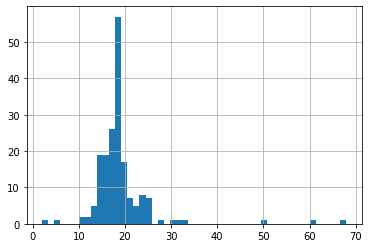

In [15]:
#what is the living area in thos appartments:
app_0_bedroom['living_area'].hist(bins = 50)

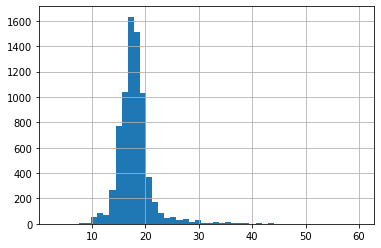

In [16]:
#what is the liing area for app with 1 bedroom:
app_0_bedroom = df[df['bedrooms'] == 1]['living_area']
app_0_bedroom.hist(bins = 50)

In [17]:
#the graphs are very similar.
#for app with 0 bedrooms and an area between 10 to 50 will get the value of 1 bedroom.
#studio app that are up to 75 will also get the value 1 bedroom
def correct_bedroom(row):
    bedrooms = row['bedrooms']
    living_area = row['living_area']
    total_area = row['total_area']
    is_studio = row['is_studio']
    
    if bedrooms == 0:
        if living_area >= 10 and living_area <= 50:
            return 1
        elif total_area < 75 and is_studio == True:
            return 1
        elif total_area < 50:
            return 1
    
    return bedrooms

df['bedrooms'] = df.apply(correct_bedroom, axis = 1)

app_0_bedroom = df[df['bedrooms'] == 0]
print('there are ', app_0_bedroom['bedrooms'].count(), 'appartments with 0 bedrooms')


there are  2 appartments with 0 bedrooms


In [18]:
#viwe the app with 0 bedrooms
#what is the living area in thos appartments:
app_0_bedroom = df[df['bedrooms'] == 0]
app_0_bedroom

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
19392,2018-07-26,90,1420000,0,NaN,NaN,371.0,NaN,3.57,7.0,...,NaN,False,True,Saint Petersburg,25257.0,6060.0,761.0,1.0,584.0,1.0
20082,2017-11-08,537,326000,0,NaN,60.5,98.4,NaN,3.10,5.0,...,NaN,True,False,Saint Petersburg,26972.0,5819.0,NaN,0.0,674.0,1.0


In [19]:
#I will consider these lines outliers and delete them.
indexNames = df[df['bedrooms'] == 0].index
df.drop(indexNames , inplace=True)

In [20]:
#kitchen_area

kitchen_area_missing = df['kitchen_area'].isna().sum()
print('there are', kitchen_area_missing, 'rown with missing kitchen area value')

there are 2276 rown with missing kitchen area value


In [21]:
#find the common kitchen area by number of bedrooms
common_kitchen_area =  df.pivot_table(index = 'bedrooms', values = 'kitchen_area', aggfunc = ('median'))
common_kitchen_area.columns = ['common_kitchen_area']
common_kitchen_area

,common_kitchen_area
bedrooms,
1,9.04
2,8.80
3,9.50
4,11.10
5,15.10
6,19.50
7,20.00
8,25.00
9,14.30


In [22]:
df = df.join(common_kitchen_area, on = 'bedrooms')

In [23]:
def update_kitchen_area(row):
    kitchen_area = row['kitchen_area']
    common_kitchen_area = row['common_kitchen_area']
    if kitchen_area == 0:
        return common_kitchen_area    
    return kitchen_area

df['kitchen_area'] = df['kitchen_area'].fillna(0)
df['kitchen_area'] = df.apply(update_kitchen_area, axis = 1)




In [24]:
#living_area

living_area_missing = df['living_area'].isna().sum()
print('there are', living_area_missing, 'rown with missing living area value')

there are 1902 rown with missing living area value


In [25]:
area_data = df.pivot_table(index = 'bedrooms', values = ('living_area', 'total_area'), aggfunc = ('median'))

area_data['common_share_living_total'] = area_data['living_area'] / area_data['total_area']
area_data_share = area_data['common_share_living_total']


In [26]:
df = df.join(area_data_share, on = 'bedrooms')

In [27]:
def update_living_area(row):
    living_area = row['living_area']
    total_area = row['total_area']
    common_share_living_total = row['common_share_living_total']
    if living_area == 0:
        return (common_share_living_total * total_area)
    return living_area

df['living_area'] = df['living_area'].fillna(0)
df['living_area'] = df.apply(update_living_area, axis = 1)


In [28]:
#balconies
#change null into 0

df['balconies'] = df['balconies'].fillna(0)
df['balconies'] = df['balconies'].astype('int')

In [29]:
#ceiling_height

ceiling_height_missing = df[df['ceiling_height'].isna()]
print('there are', ceiling_height_missing['ceiling_height'].isna().sum(), 'rown with missing ceiling_height value')

there are 9195 rown with missing ceiling_height value


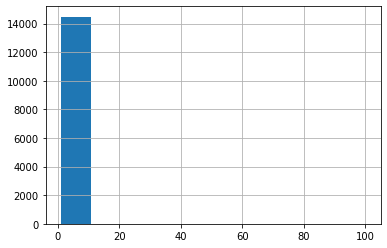

In [30]:
df['ceiling_height'].hist()

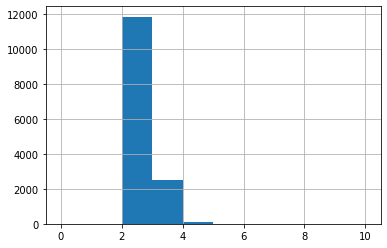

In [31]:
df['ceiling_height'].hist(bins = 10, range = (0, 10))

In [32]:
ciling_median = df['ceiling_height'].median()
print('ciling median is:', ciling_median)

ciling median is: 2.65


In [33]:
#extra low cilings
df[df['ceiling_height'] < 2]

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,common_kitchen_area,common_share_living_total
5712,2017-08-14,248,30000,2,5.20,27.5,42.8,0,1.20,2.0,...,False,Mga village,NaN,NaN,NaN,NaN,NaN,NaN,8.80,0.575472
16934,2017-10-17,71,82000,1,8.34,17.4,40.0,0,1.75,37.0,...,False,Saint Petersburg,18732.0,20444.0,NaN,0.0,80.0,3.0,9.04,0.484848
22590,2018-10-31,13,120000,2,10.00,32.4,55.0,0,1.00,12.0,...,False,Saint Petersburg,33053.0,14217.0,293.0,2.0,289.0,2.0,8.80,0.575472


In [34]:
#I will consider ciling hight below 1.75 to be a typo, and will place the median value
df.loc[df['ceiling_height'] < 1.7, 'ceiling_height'] = ciling_median


In [35]:
#extra high ciling
df[df['ceiling_height'] > 6].head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,common_kitchen_area,common_share_living_total
355,2018-07-12,259,72000,2,8.80,32.0,55.2,2,25.0,5.0,...,False,Gatchina,NaN,NaN,NaN,NaN,NaN,NaN,8.80,0.575472
3148,2018-11-12,0,58000,3,8.00,53.0,75.0,0,32.0,3.0,...,False,Volkhov,NaN,NaN,NaN,NaN,NaN,NaN,9.50,0.616438
3474,2018-03-16,125,28000,1,7.30,15.3,30.0,0,8.0,5.0,...,False,Nurma village,NaN,NaN,NaN,NaN,NaN,NaN,9.04,0.484848
4643,2018-02-01,181,86000,2,7.00,30.0,45.0,1,25.0,9.0,...,False,Saint Petersburg,12016.0,13256.0,658.0,1.0,331.0,1.0,8.80,0.575472
4876,2017-09-27,28,60000,1,9.04,17.0,25.0,2,27.0,25.0,...,True,Murino village,NaN,NaN,NaN,NaN,NaN,NaN,9.04,0.484848


In [36]:
#for cilings up to 20m will accept as a posible value.
#for values above 20m, will consider a typo, and will divide by 10 .
#for values above 30, will write median value
#if value is missing, will write median value.


def update_ceiling_height(row):
    ceiling_height = row['ceiling_height']
    
    if ceiling_height > 30:
        return ciling_median
    if ceiling_height >= 20 and ceiling_height <= 30:
        return ceiling_height / 10
    if ceiling_height == 0:
        return ciling_median
    
    return ceiling_height

df['ceiling_height'] = df['ceiling_height'].fillna(0)
df['ceiling_height'] = df.apply(update_ceiling_height, axis = 1)


In [37]:
#floors_total

floors_total_missing = df[df['floors_total'].isna()]
print('there are', floors_total_missing['floors_total'].isna().sum(), 'rown with missing floors_total value')

there are 86 rown with missing floors_total value


In [38]:
#since I can not guess the currect floors_total, will assume that the value floor is the top floor in the building.

def update_floors_total(row):
    floors_total = row['floors_total']
    floor = row['floor']
    
    if floors_total == 0:
        return floor

    return floors_total
    
df['floors_total'] = df['floors_total'].fillna(0)
df['floors_total'] = df.apply(update_floors_total, axis = 1)
df['floors_total'] = df['floors_total'].astype('int')

In [39]:
#bike_parking
#boolean value, is missing value place False
df['bike_parking'] = df['bike_parking'].fillna(False)
df['bike_parking'].unique()


array([False,  True])

In [40]:
#is_studio
df['is_studio'].unique()

array([False,  True])

In [41]:
#is_open_plan 
df['is_open_plan'].unique()

array([False,  True])

In [42]:
#locality_name
df['locality_name'] = df['locality_name'].str.lower()
df['locality_name'].sort_values().unique()


array(['agalatovo village', 'aleksandrovskaya village', 'annino village',
       'aro village', 'baryshevo village', 'batovo village',
       'beloostrov village', 'boksitogorsk', 'bolshaya izhora village',
       'bolshaya vruda village', 'bolshiye kolpany village',
       'bolshoy sabsk village', 'bolshoye reyzino village', 'bor village',
       'borisova griva village', 'bugry village', 'chudskoy bor village',
       'druzhnaya gorka village', 'druzhnoselye village',
       'dubrovka village', 'dzerzhinskogo village', 'elizavetino village',
       'falileyevo village', 'fort krasnaya gorka village',
       'fyodorovskoye', 'garbolovo village', 'gatchina',
       'gavrilovo village', 'gladkoye village', 'glazhevo village',
       'glebychevo village', 'glinka village', 'goncharovo village',
       'gorbunki village', 'gostilitsy village', 'gromovo village',
       'hapo-oe village', 'ilichyovo village', 'issad village',
       'ivangorod', 'izvara village', 'kalitino village',
      

In [43]:
#parks_within_3000
#missing value will get 0
df['parks_within_3000'] = df['parks_within_3000'].fillna(0)
df['parks_within_3000'] = df['parks_within_3000'].astype('int')

In [44]:
#ponds_within_3000
#missing value will get 0
df['ponds_within_3000'] = df['ponds_within_3000'].fillna(0)
df['ponds_within_3000'] = df['ponds_within_3000'].astype('int')

In [45]:
#city_center_dist, park_dist, pond_dist
#did not modify because there are missing values, and can not place a different value without corrupting the data.

In [46]:
#price per square meter
def price_per_square_meter(row):
    total_area = row['total_area']
    last_price = row['last_price']
    
    return int(last_price / total_area)

df['price_per_square_meter'] = df.apply(price_per_square_meter, axis = 1)

In [47]:
price_per_square_meter_by_rooms = df.pivot_table(index = 'bedrooms', values = 'price_per_square_meter', aggfunc = ('median') )
price_per_square_meter_by_rooms

,price_per_square_meter
bedrooms,
1,2000.0
2,1855.5
3,1779.0
4,1853.0
5,1930.0
6,1988.0
7,2176.0
8,2134.5
9,1850.0


In [48]:
max_value = price_per_square_meter_by_rooms['price_per_square_meter'].max()
min_value = price_per_square_meter_by_rooms['price_per_square_meter'].min()

print('The price per square meter is between ', min_value, ' to and ', max_value)
print('There is an out layer with 12 rooms')
df[df['bedrooms'] == 12]


The price per square meter is between  1687.0  to and  9333.0
There is an out layer with 12 rooms


,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,common_kitchen_area,common_share_living_total,price_per_square_meter
19540,2017-12-06,106,8400000,12,112.0,409.7,900.0,0,2.8,25,...,saint petersburg,30706.0,7877.0,NaN,0,318.0,2,112.0,0.455222,9333


In [49]:
indexNames = df[df['bedrooms'] == 12].index
df.drop(indexNames , inplace=True)

In [50]:
#after preproccessing 
df.describe()

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,common_kitchen_area,common_share_living_total,price_per_square_meter
count,23696.000000,2.369600e+04,23696.000000,23696.000000,23696.000000,23696.000000,23696.000000,23696.000000,23696.000000,23696.000000,23696.000000,18154.000000,18177.000000,8078.000000,23696.000000,9107.000000,23696.000000,23696.000000,23696.000000,23696.000000
mean,156.597738,1.304194e+05,2.078621,10.448493,34.612000,60.298501,0.591155,2.698437,10.671253,5.891712,9.858753,28793.862014,14192.533146,490.771107,0.469067,517.978478,0.590817,9.349379,0.558723,1987.535407
std,213.545401,2.108533e+05,1.064268,5.603823,22.573249,35.177897,0.959336,0.248185,6.595416,4.883916,5.682788,12631.881796,8608.533849,342.325982,0.748561,277.752807,0.883999,1.416703,0.057546,1004.960962
min,0.000000,2.440000e+02,1.000000,1.300000,2.000000,12.000000,0.000000,1.750000,1.000000,1.000000,0.000000,0.000000,181.000000,1.000000,0.000000,13.000000,0.000000,8.800000,0.484848,2.000000
25%,22.000000,6.800000e+04,1.000000,7.400000,18.711364,40.000000,0.000000,2.600000,5.000000,2.000000,6.000000,18582.750000,9238.000000,288.000000,0.000000,294.000000,0.000000,8.800000,0.484848,1531.000000
50%,74.000000,9.300000e+04,2.000000,9.040000,30.000000,52.000000,0.000000,2.650000,9.000000,4.000000,9.000000,26726.000000,13101.000000,455.000000,0.000000,502.000000,0.000000,9.040000,0.575472,1900.000000
75%,199.000000,1.359800e+05,3.000000,11.500000,42.300000,69.800000,1.000000,2.700000,16.000000,8.000000,14.000000,37274.500000,16293.000000,612.000000,1.000000,729.500000,1.000000,9.500000,0.616438,2284.000000
max,1580.000000,1.526000e+07,19.000000,107.000000,427.546729,631.200000,5.000000,14.000000,60.000000,33.000000,50.000000,84869.000000,65968.000000,3190.000000,3.000000,1344.000000,3.000000,100.000000,0.708841,38150.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23696 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date_posted                23696 non-null  datetime64[ns]
 1   days_listed                23696 non-null  int32         
 2   last_price                 23696 non-null  int32         
 3   bedrooms                   23696 non-null  int64         
 4   kitchen_area               23696 non-null  float64       
 5   living_area                23696 non-null  float64       
 6   total_area                 23696 non-null  float64       
 7   balconies                  23696 non-null  int32         
 8   ceiling_height             23696 non-null  float64       
 9   floors_total               23696 non-null  int32         
 10  floor                      23696 non-null  int64         
 11  total_images               23696 non-null  int64         
 12  bike

### Step 3. Make calculations and add them to the table

In [52]:
#price per square meter
price_per_square_meter_by_rooms

,price_per_square_meter
bedrooms,
1,2000.0
2,1855.5
3,1779.0
4,1853.0
5,1930.0
6,1988.0
7,2176.0
8,2134.5
9,1850.0


In [53]:
#day of the week
df['day_published'] = df['date_posted'].dt.weekday
df['month_published'] = df['date_posted'].dt.month
df['year_published'] = df['date_posted'].dt.year

In [54]:
#which floor
def which_floor(row):
    floors_total = row['floors_total']
    floor = row['floor']
    
    if floor == 1:
        return 'first'
    if floor == floors_total:
        return 'last'
    return 'other'

df['which_floor'] = df.apply(which_floor, axis = 1)

In [55]:
#ratio between the living space and the total area
def ration_living_total(row):
    living_area = row['living_area']
    total_area = row['total_area']
    
    return (living_area / total_area)

df['ration_living_total'] = df.apply(ration_living_total, axis = 1)

In [56]:
#ration between the kitchen and the total area

def ration_kitchen_total(row):
    kitchen_area = row['kitchen_area']
    total_area = row['total_area']
    
    return (kitchen_area / total_area)

df['ration_kitchen_total'] = df.apply(ration_kitchen_total, axis = 1)


### Step 4. Conduct exploratory data analysis and follow the instructions below:

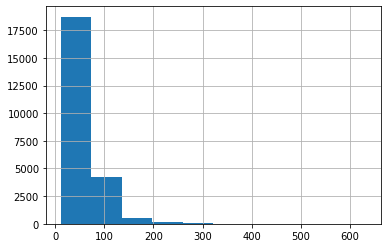

In [57]:
# spread of apartments size
df['total_area'].hist()

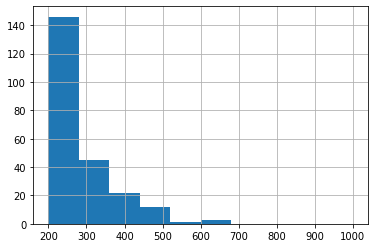

In [58]:
# spread of medium to very big apartments 
df['total_area'].hist(range = (200, 1000))

In [59]:
#The square area, for the majority of the apartment is below 150.
#As the apartments get bigger there are less of those on the market.


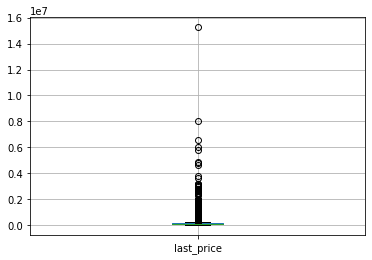

In [60]:
boxplot = df.boxplot(column=['last_price'])

In [61]:
#The price range of apartments is very wide.
#Makes sense to look at it when grouped by amount of rooms

In [62]:
#Amount of ads by amount of bedrooms, and median price
price_by_rooms = df.pivot_table(index = 'bedrooms', values = 'last_price', aggfunc = ('median', 'count'))
price_by_rooms

,count,median
bedrooms,,
1,8242.0,71700.0
2,7940.0,95403.5
3,5814.0,124000.0
4,1180.0,180000.0
5,326.0,280000.0
6,105.0,380000.0
7,59.0,498000.0
8,12.0,461900.0
9,8.0,475000.0


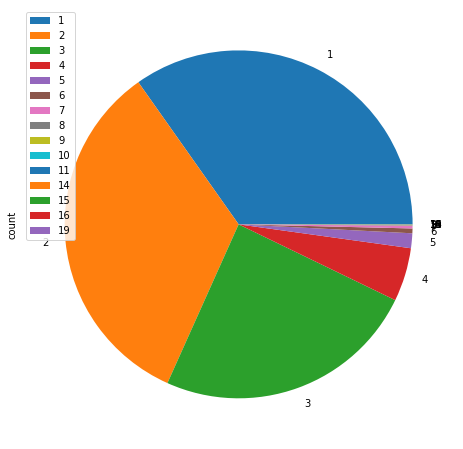

In [63]:
#Pie chart divided by bedrooms
price_by_rooms.plot.pie(y = 'count', figsize = (8, 8))

In [64]:
#Small apartments are very popular.
#Most of the ads are for small apartments of up to 3 rooms.
#Then the middle range apartments with 4 up to 7 rooms.
#And very few apartments that have 8 rooms or more.

In [65]:
#Show distribution of price by amount of bedrooms
#and price per area for amount of bedrooms

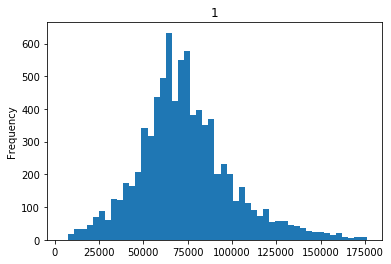

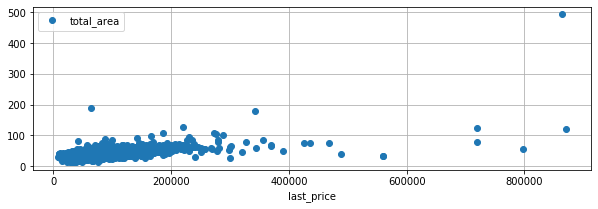

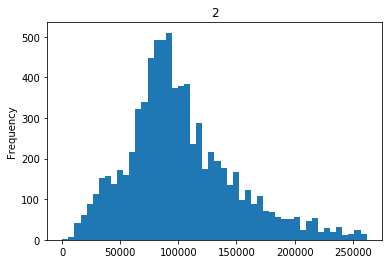

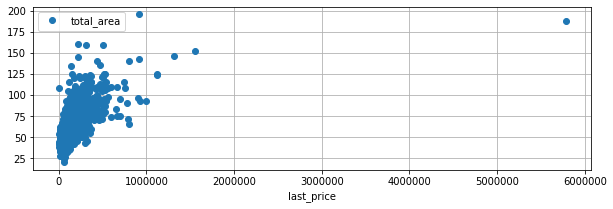

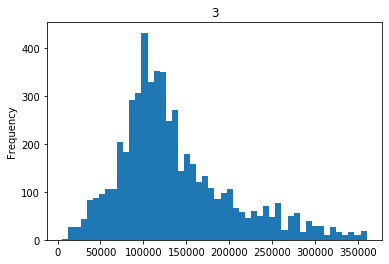

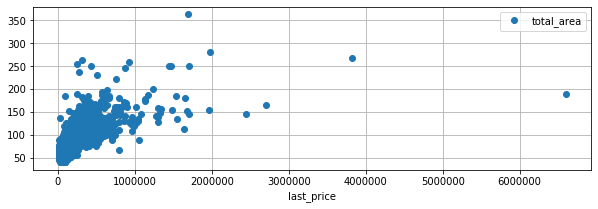

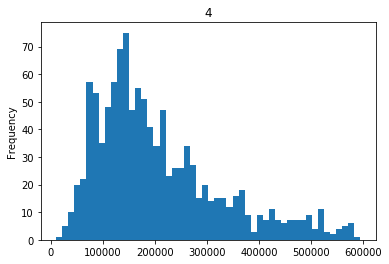

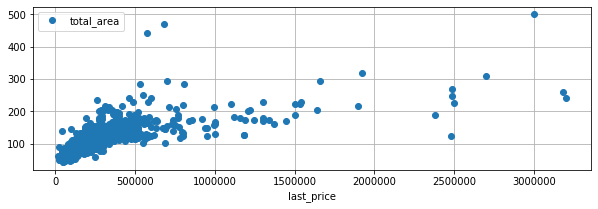

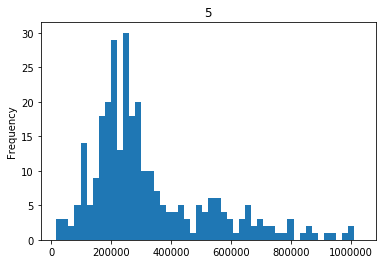

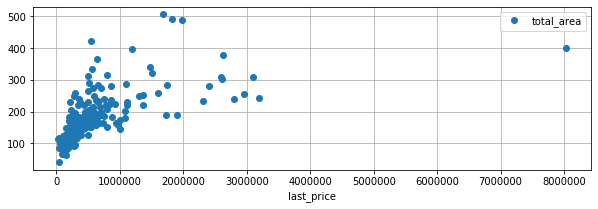

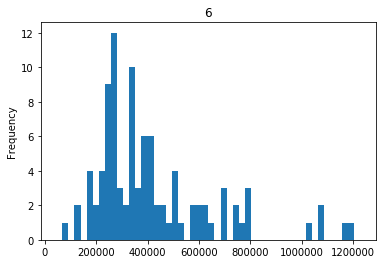

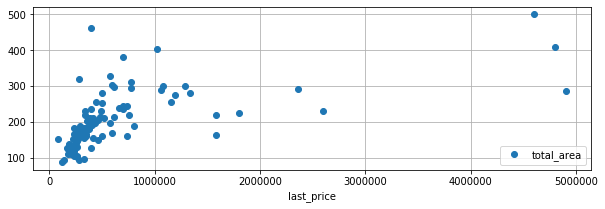

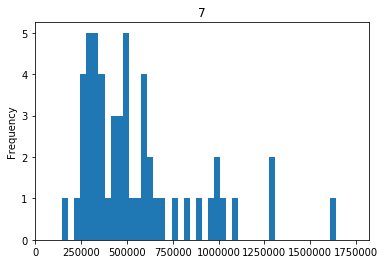

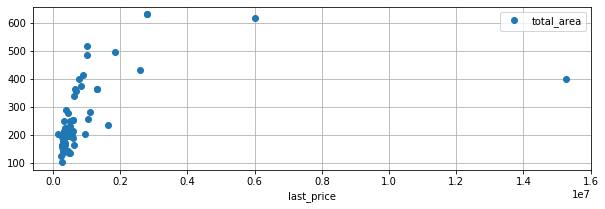

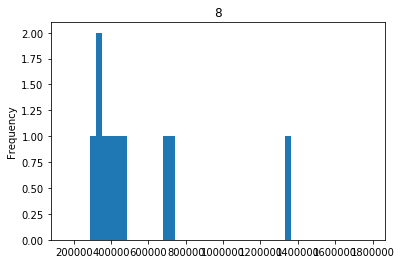

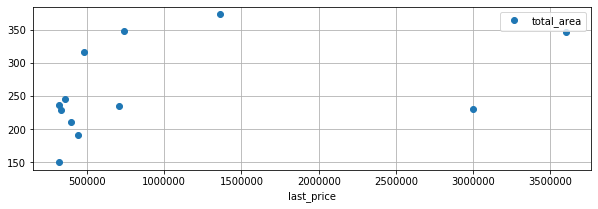

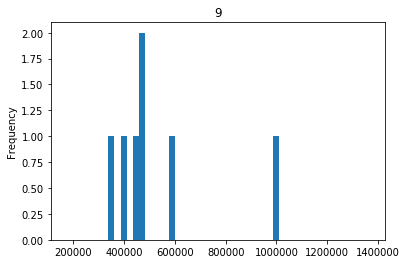

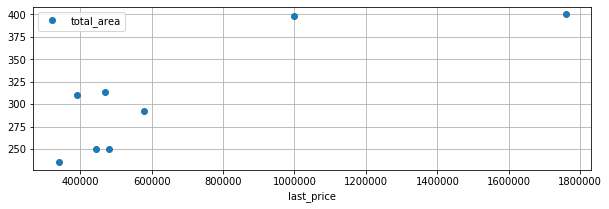

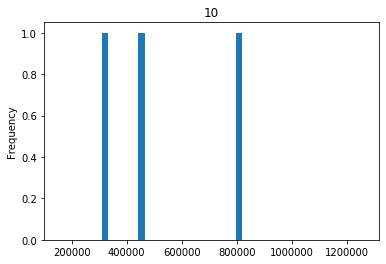

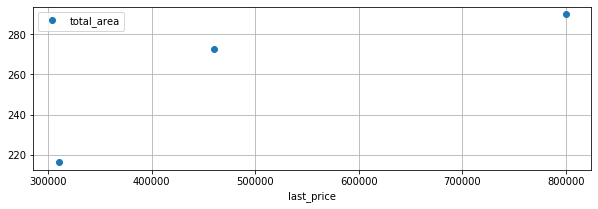

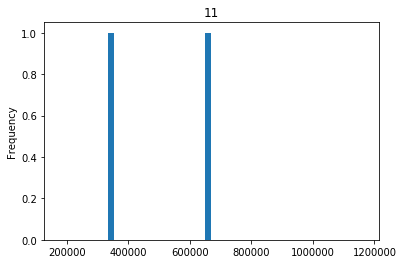

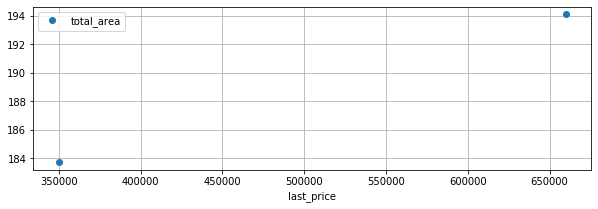

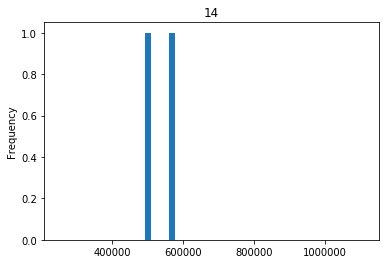

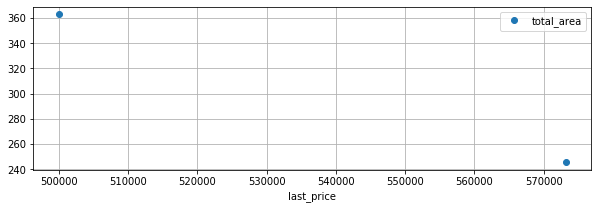

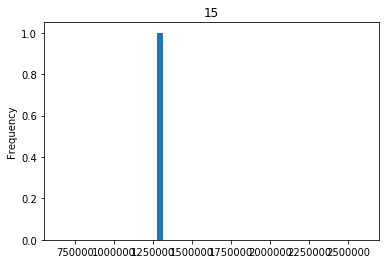

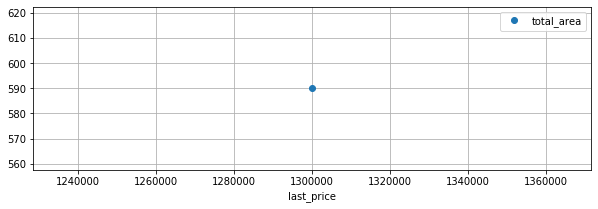

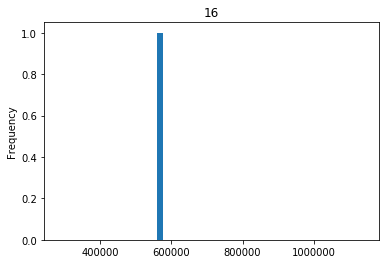

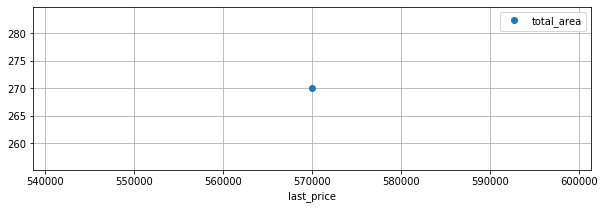

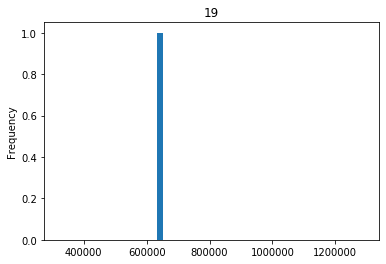

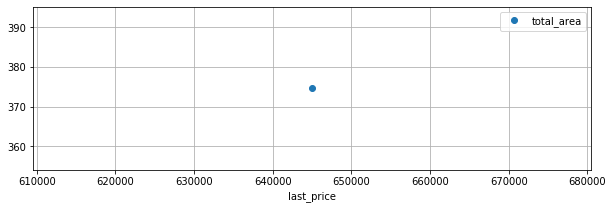

In [66]:
for rooms, group_data in df.groupby('bedrooms'):
    describe = group_data['last_price'].describe()
    low_lim = describe[3] / 2
    high_lim = describe[6] * 2
    group_data['last_price'].plot(y = 'bedroom', title= rooms, kind='hist', bins=50, range = (low_lim, high_lim))
    
    group_data.sort_values('total_area').plot(x='last_price', y='total_area', style='o', grid=True, figsize=(10, 3));
    plt.show()
    
    

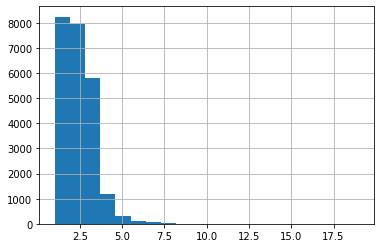

In [67]:
#number of rooms
df['bedrooms'].hist(bins = 20)

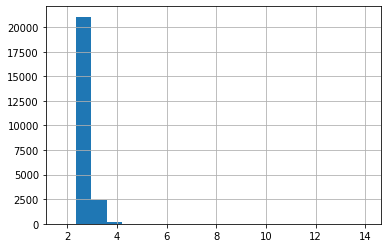

In [68]:
#ceiling height
df['ceiling_height'].hist(bins = 20)

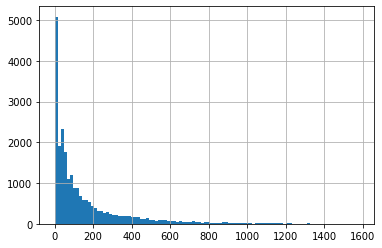

In [69]:
# time it usually takes to complete a sale
df['days_listed'].hist(bins = 100)

In [70]:
#df['days_listed'].describe()

In [71]:
listed_mean = int (df['days_listed'].mean())
listed_median = int (df['days_listed'].median())
print('The average (mean) time it takes to complete a sale is:', listed_mean, 'days')
print('And the median time is:', listed_median, 'days')
print('25% of the sales has happened within', int(df['days_listed'].describe()[4]), 'daya.' )
print('below this value would be considered a fast sale.')
print('75% of the sales happened within', int(df['days_listed'].describe()[6]), 'daya')
print('Above this value would be considered that is takes extra long time')

The average (mean) time it takes to complete a sale is: 156 days
And the median time is: 74 days
25% of the sales has happened within 22 daya.
below this value would be considered a fast sale.
75% of the sales happened within 199 daya
Above this value would be considered that is takes extra long time


In [72]:
#Remove rare and outlying values
df.shape


(23696, 31)

In [73]:
#for days_listed, remove above 400
indexNames = df[df['days_listed'] > 400].index
df.drop(indexNames , inplace=True)

In [74]:
df.shape

(21060, 31)

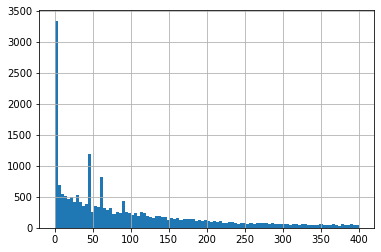

In [75]:
df['days_listed'].hist(bins=100)


In [76]:
# for bedrooms remove above 7 bedrooms
indexNames = df[df['bedrooms'] > 7].index
df.drop(indexNames , inplace=True)

In [77]:
df.shape

(21040, 31)

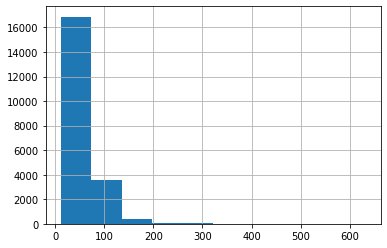

In [78]:
# spread of apartments size
df['total_area'].hist()

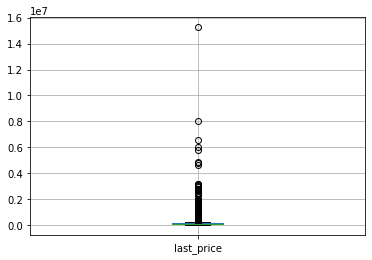

In [79]:
boxplot = df.boxplot(column=['last_price'])

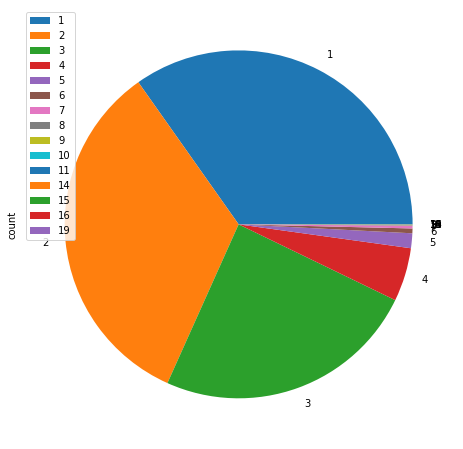

In [80]:
#Pie chart divided by bedrooms
price_by_rooms.plot.pie(y = 'count', figsize = (8, 8))

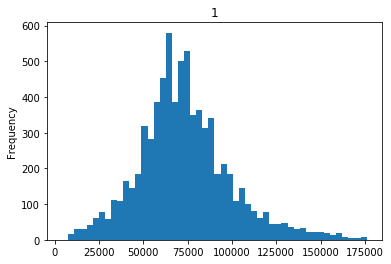

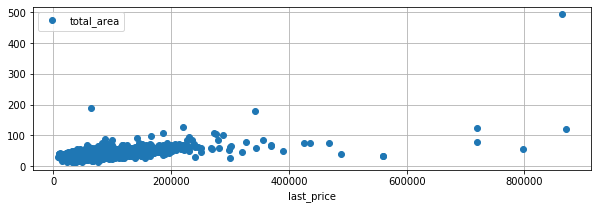

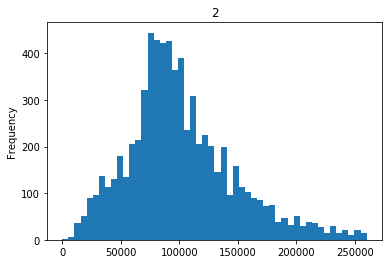

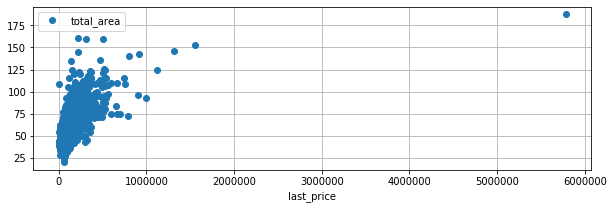

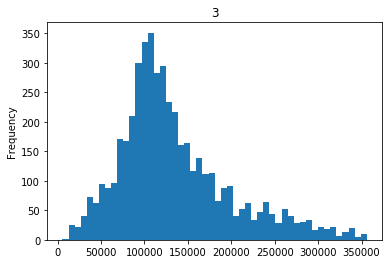

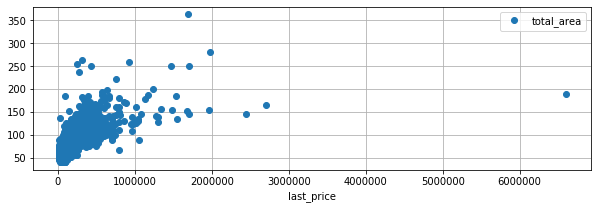

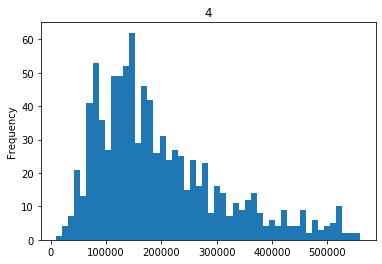

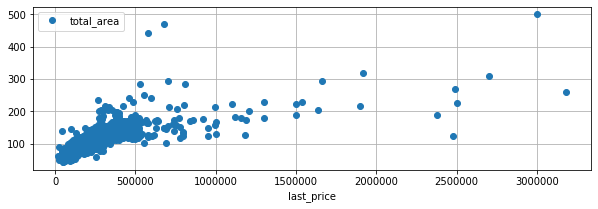

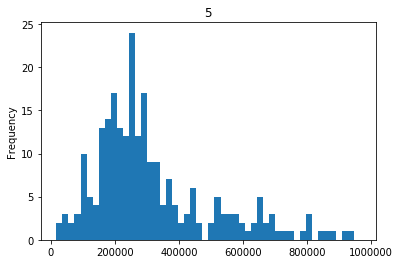

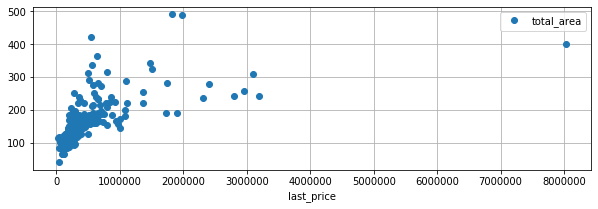

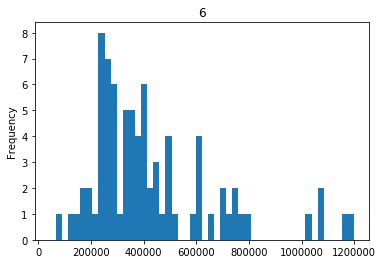

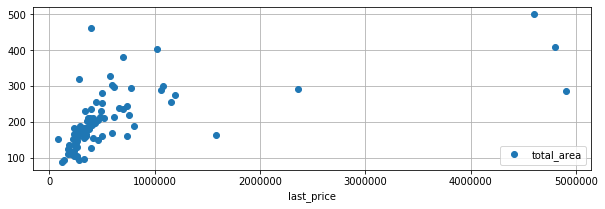

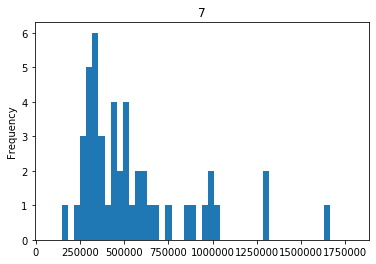

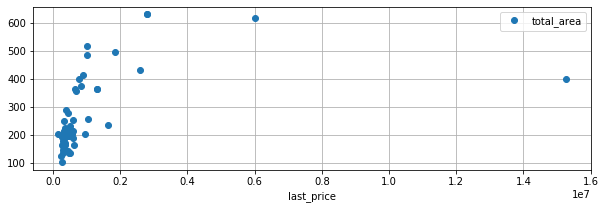

In [81]:
for rooms, group_data in df.groupby('bedrooms'):
    describe = group_data['last_price'].describe()
    low_lim = describe[3] / 2
    high_lim = describe[6] * 2
    group_data['last_price'].plot(y = 'bedroom', title= rooms, kind='hist', bins=50, range = (low_lim, high_lim))
    
    group_data.sort_values('total_area').plot(x='last_price', y='total_area', style='o', grid=True, figsize=(10, 3));
    plt.show()
    

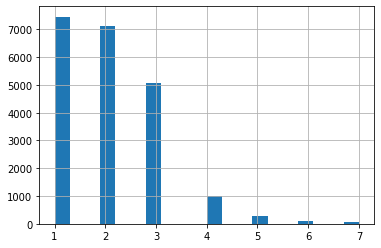

In [82]:
#number of rooms
df['bedrooms'].hist(bins = 20)

<div class="alert alert-success" role="alert">
Great. Nice charts</div>


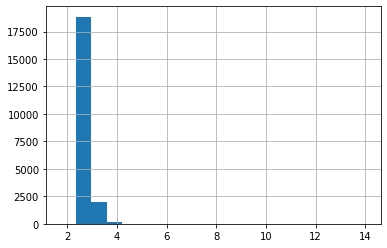

In [83]:
#ceiling height
df['ceiling_height'].hist(bins = 20)

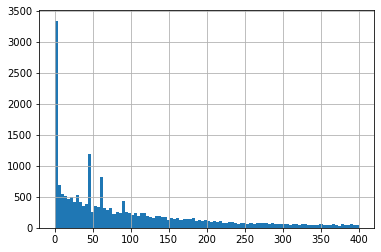

In [84]:
# time it usually takes to complete a sale
df['days_listed'].hist(bins = 100)

In [85]:
#Removing the rare and outlying values had very little affect over the histograms and values.
#Most of those rare values originated in very expensive deals with very big and expensive apartments.  


In [86]:
#Which factors have had the biggest influence on an apartment’s price?
#value depends on the total square area, number of rooms, 
#floor (top or bottom), or the proximity to the city center area. 
#Also check whether the publication date has any effect on the price:
#specifically, day of the week, month, and year. 

In [87]:
#I will compare different parameters with the price_per_square_meter ration.

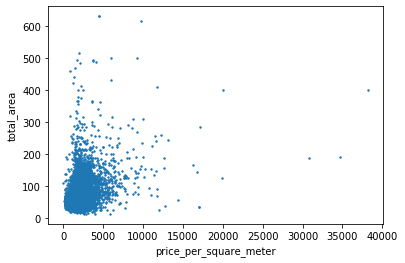

In [88]:
#compare with square area
df.plot(x='price_per_square_meter', y = 'total_area', kind = 'scatter', s = 2)

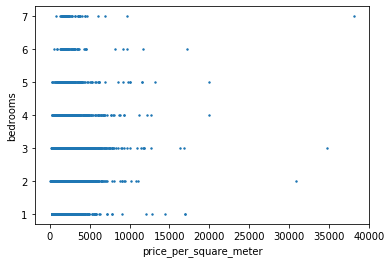

In [89]:
#compare with number of rooms
df.plot(x='price_per_square_meter', y = 'bedrooms', kind = 'scatter', s = 2)

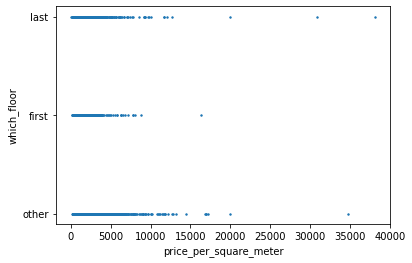

In [90]:
#compare with floor (top or bottom)
df.plot(x='price_per_square_meter', y = 'which_floor', kind = 'scatter', s = 2)

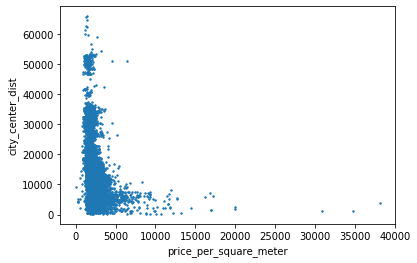

In [91]:
#compare with proximity to the city center area
df.plot(x='price_per_square_meter', y = 'city_center_dist', kind = 'scatter', s = 2)

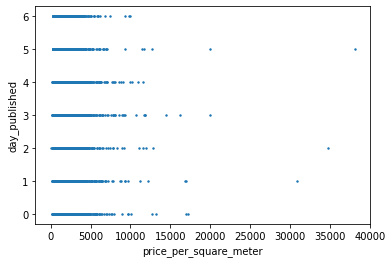

In [92]:
#compare with day_published
df.plot(x='price_per_square_meter', y = 'day_published', kind = 'scatter', s = 2)

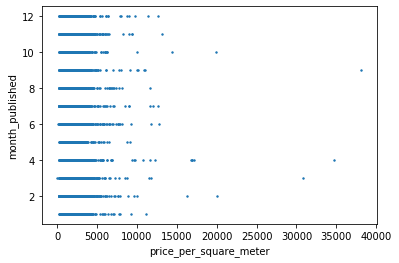

In [93]:
#compare with month_published
df.plot(x='price_per_square_meter', y = 'month_published', kind = 'scatter', s = 2)

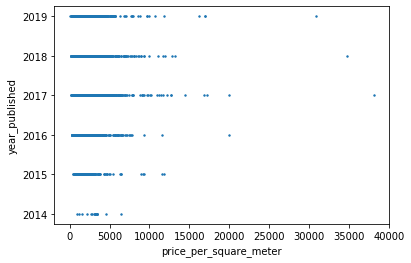

In [94]:
#compare with year_published
df.plot(x='price_per_square_meter', y = 'year_published', kind = 'scatter', s = 2)

In [95]:
#The proximity to the city center area is a key factor on the apartment price.

In [96]:
#10 localities with the largest number of ads
localities = df.pivot_table(index = 'locality_name', values = ['price_per_square_meter'], aggfunc = ('count', 'mean'))

localities.columns = ['count', 'mean_price_per_square_meter']
localities.sort_values(by = 'count', ascending = False).head(10)

,count,mean_price_per_square_meter
locality_name,,
saint petersburg,13903.0,2284.764583
murino village,509.0,1718.349705
shushary village,401.0,1576.583541
vsevolozhsk,349.0,1379.825215
pushkin,328.0,2056.905488
kolpino,309.0,1505.436893
pargolovo village,296.0,1795.395270
gatchina,270.0,1380.025926
kudrovo village,261.0,1853.555556


In [97]:
#Determine which ones have the highest and lowest housing prices.


In [98]:
localities_list_temp = localities.sort_values(by = 'count', ascending = False).head(10)
localities_list = localities_list_temp.index.values.tolist()

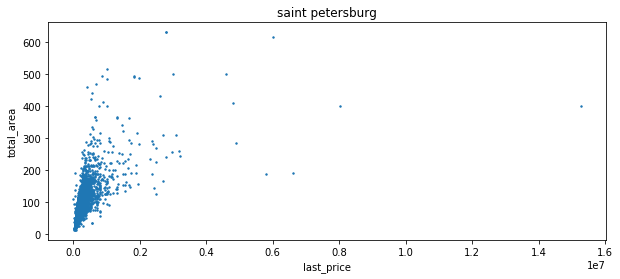

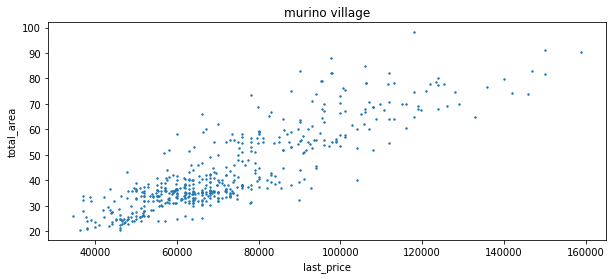

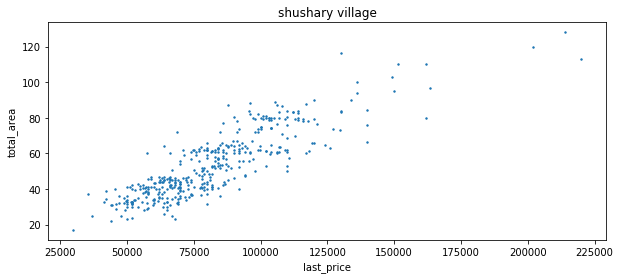

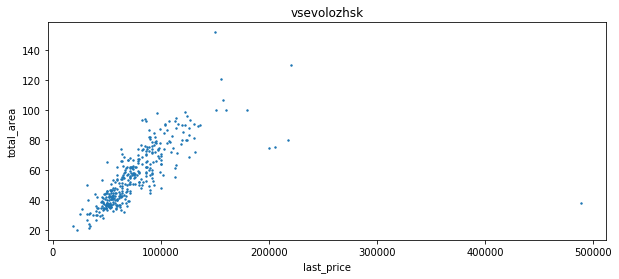

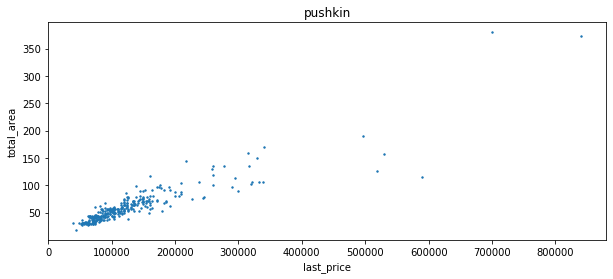

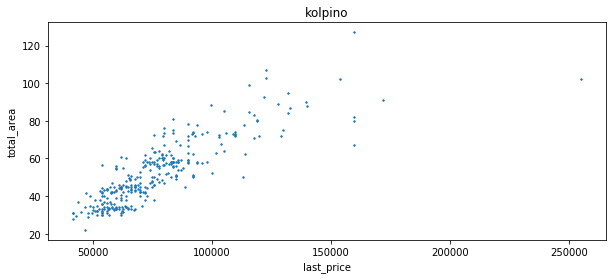

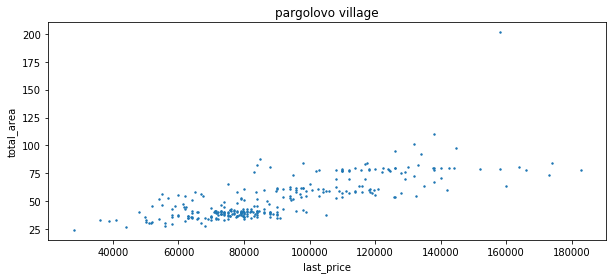

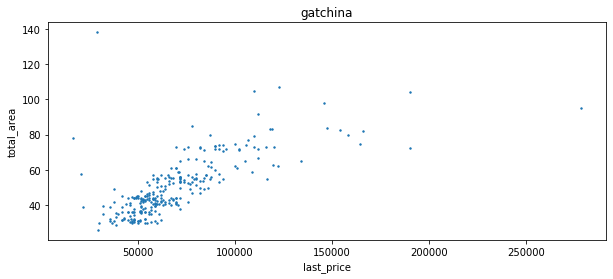

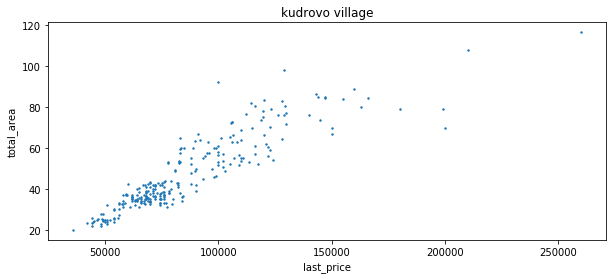

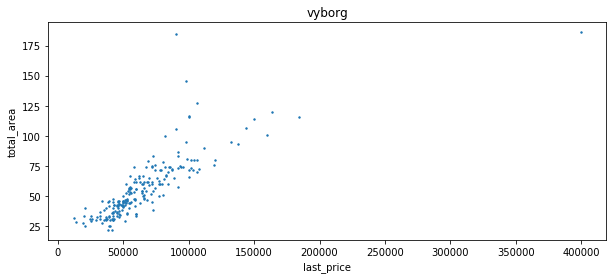

In [99]:
for name in localities_list:
    #print(name)
    df[df['locality_name'] == 
       name].plot(x='last_price', y = 'total_area', 
                  kind = 'scatter', s = 2, title = name,figsize = (10, 4))

In [100]:
#The highest housing prices are at saint Petersburg
#The lowest are at vyborg


In [101]:
#city center border
saint_petersburg = df[df['locality_name'] == 'saint petersburg'].loc[:, ['price_per_square_meter', 'city_center_dist']]
saint_petersburg.sort_values(by = 'city_center_dist', inplace=True)


In [102]:
#remove rown where distance is missing
saint_petersburg.dropna(inplace=True)
saint_petersburg['ratio_city_center'] = saint_petersburg['price_per_square_meter'] / saint_petersburg['city_center_dist']
saint_petersburg

,price_per_square_meter,city_center_dist,ratio_city_center
13694,3911,181.0,21.607735
1182,3452,208.0,16.596154
8614,2198,215.0,10.223256
1934,1775,287.0,6.184669
20873,2026,291.0,6.962199
...,...,...,...
814,1369,28109.0,0.048703
10798,1564,28644.0,0.054601
16787,1130,29263.0,0.038615
13031,1478,29343.0,0.050370


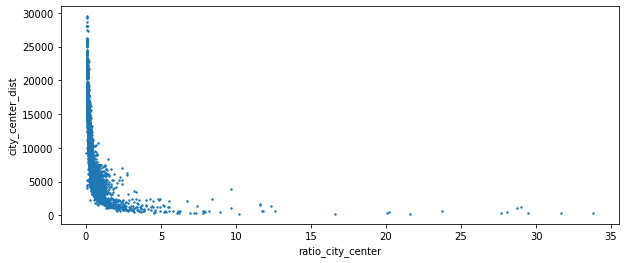

In [103]:
saint_petersburg.plot(x='ratio_city_center', y = 'city_center_dist', kind = 'scatter', s = 2,figsize = (10, 4))

In [104]:
#Prices change significantly at the distance of about 2000 meters.
#That is the limit of the city center


In [105]:
saint_petersburg = df[df['locality_name'] == 'saint petersburg']


In [106]:
city_center = df[(df['locality_name'] == 'saint petersburg') & (df['city_center_dist'] < 2000)]


In [107]:
#total area


In [108]:
list = ['total_area', 'last_price', 'bedrooms', 'ceiling_height']


total_area
TOP: city_center.  BUTTOM: saint_petersburg


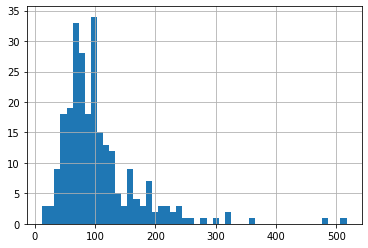

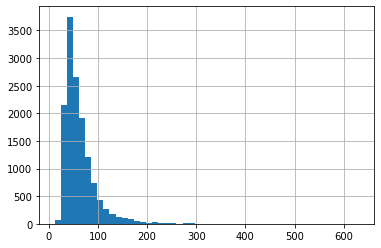

***************************
last_price
TOP: city_center.  BUTTOM: saint_petersburg


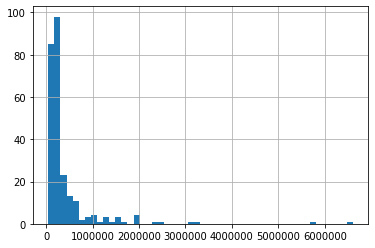

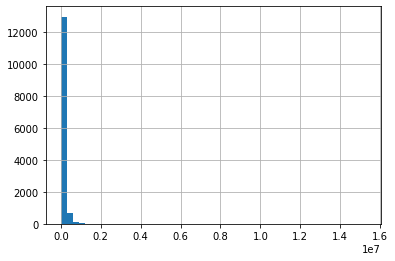

***************************
bedrooms
TOP: city_center.  BUTTOM: saint_petersburg


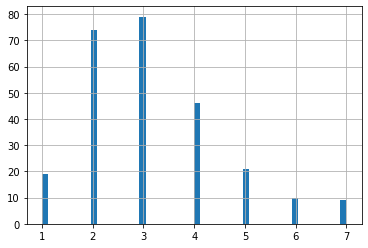

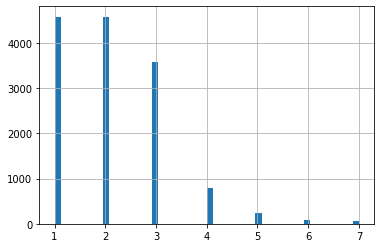

***************************
ceiling_height
TOP: city_center.  BUTTOM: saint_petersburg


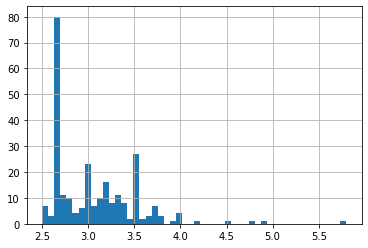

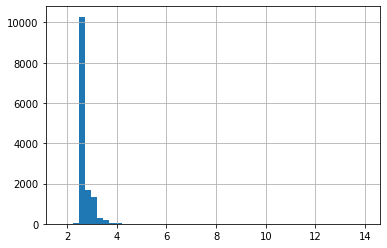

***************************


In [109]:
for hist_name in list:
    print(hist_name)
    print('TOP: city_center.  BUTTOM: saint_petersburg')
    city_center[hist_name].hist(bins = 50)
    plt.show()
    saint_petersburg[hist_name].hist(bins = 50)
    plt.show()
    print("***************************")


In [110]:
#the total area of apartments in the city center tend to be bigger, the majority are about 100, while in the city closer to 50.
#Regarding the price, at the center they cost more.
#Regarding bedrooms, while in the city most apartments are 1 or 2 bedrooms.
#In the center the accumulation of apartments with 3 rooms or more is bigger than those with 1 or 2 rooms.
#The ceiling  tend to be higher as well in the center.

### Step 5. Overall conclusion

The apartments in the city center tend to cost more then placed that are further then 2000m .
They are usually bigger, with higher ceilings. 
This should mean that the population living at the city center is financially stronger.
